# Problem Statement:

    Clustering the Agricultural data of INDIA and building a model. 

In [1]:
# Imported the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
 
from sklearn import tree
from ipykernel import kernelapp as app



import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Take care of warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
agri_india = pd.read_csv("apy.csv") 

In [3]:
agri_india.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [4]:
agri_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [5]:
agri_india.Production.dtypes


dtype('O')

- **`Inference:`** It has to be Float but it is returning the dtype as Object. If we are trying to convert to float, it returns an error saying '=' cannot be converted into float. That is how we came to know and drop them from the data set inorder to proceed. 

In [6]:
no_production = agri_india[agri_india.Production == '=']
no_production.head(20)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.0,=
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.0,=
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.0,=
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.0,=
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.0,=
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.0,=
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.0,=
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.0,=
1424,Andhra Pradesh,CHITTOOR,2007,Kharif,Sunflower,1000.0,=
1536,Andhra Pradesh,CHITTOOR,2010,Rabi,Linseed,18.0,=


In [7]:
no_production.shape # It tells us '=' is occupying only 1.51% , can easily be dropped, doesn't make much difference

(3727, 7)

In [8]:
agri_india = agri_india[~(agri_india.Production == '=')] # dropped the values

In [9]:
agri_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242364 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242364 non-null  object 
 1   District_Name  242364 non-null  object 
 2   Crop_Year      242364 non-null  int64  
 3   Season         242364 non-null  object 
 4   Crop           242364 non-null  object 
 5   Area           242364 non-null  float64
 6   Production     242364 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.8+ MB


In [10]:
agri_india.Production = agri_india.Production.astype('float64') # converted into float

In [11]:
agri_india.isnull().sum() # checked whether there are any null values or not 

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
agri_india.info() # now the production column dtype is float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242364 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242364 non-null  object 
 1   District_Name  242364 non-null  object 
 2   Crop_Year      242364 non-null  int64  
 3   Season         242364 non-null  object 
 4   Crop           242364 non-null  object 
 5   Area           242364 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [13]:
agri_india.describe() 

,Crop_Year,Area,Production
count,242364.000000,2.423640e+05,2.423640e+05
mean,2005.625770,1.216727e+04,5.824962e+05
std,4.958254,5.085714e+04,1.706571e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.022250e+03
max,2015.000000,8.580100e+06,1.250800e+09


**`Inference:`** It is clearly telling us the maximum values are way above the 75% mark in case of both "Area under cultivation in hectars" and "Production in Tonnes". It says there are **`Outliers in the data`** that needed to be treated and proceed to clustering. 

In [14]:
agri_india.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [15]:
agri_india["Crop_Yeild"] = round((agri_india.Production * 1016)/agri_india.Area,2)

In [16]:
agri_india.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Yeild
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1620.41
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,508.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3197.41
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3700.32
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,232.83


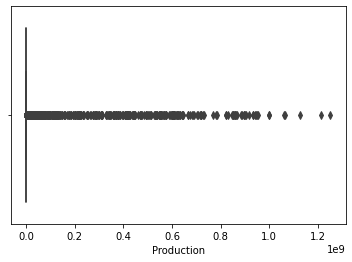

In [17]:
sns.boxplot(agri_india.Production) # Clearly there are so many outliers in the data by seeing at the boxplot for production

Text(0, 0.5, 'Production in Tonnes')

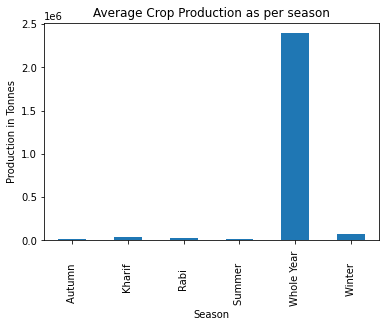

In [18]:
plt.title("Average Crop Production as per season")
agri_india.groupby("Season")["Production"].mean().plot.bar() 
plt.ylabel("Production in Tonnes")
# With the barplot by grouping unique Season values and ploting against 

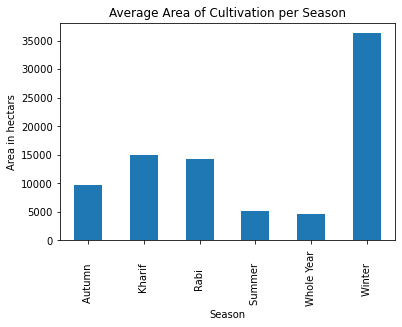

In [19]:
plt.title("Average Area of Cultivation per Season")
agri_india.groupby("Season")["Area"].mean().plot.bar()
plt.ylabel("Area in hectars")
plt.show()

# (the Barchat gives us the average area under cultivation in hectars per season calculated over a period of 18 years 
# from 1997 to 2015) 

**`Inference:`** 
1. The area of cultivation in **`Winter`** season comes out to be highest with **`35000 hectars`**.
2. Summer and whole year crop cultivation area is lowest of seasons.

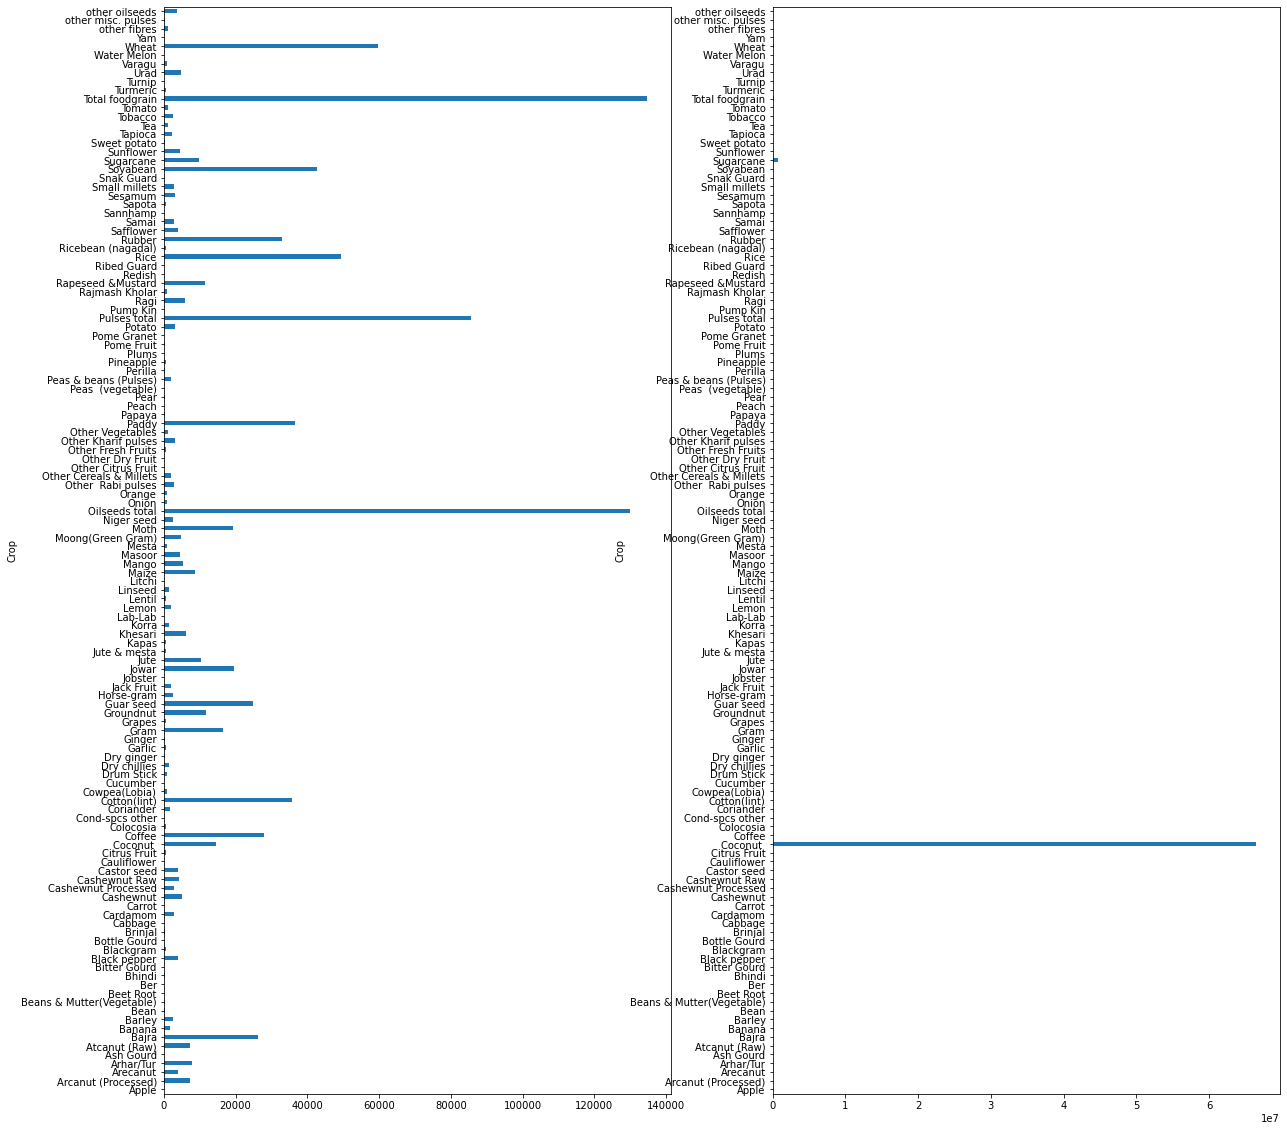

In [20]:
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1)
agri_india.groupby("Crop")["Area"].mean().plot.barh()
plt.subplot(1,2,2)
agri_india.groupby("Crop")["Production"].mean().plot.barh()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.show()

#The 1st plot shows Total foodgrains, Oilseeds total and Total pulses are comprimising other crops analysis, we better drop them

# In the second plot, Coconut is occupying the whole area. So we shall drop them and store coconut and sugarcane in some other dataframe

In [21]:
ind_prod = agri_india.groupby('Crop')['Production'].sum() 

# Grouped the data by Unique Crops and got the absolute sum of Production in Tonnes over the period of 18 yrs from 1997 to 2015

In [22]:
ind_prod.sort_values(ascending = False).head(20) 



Crop
Coconut              1.299816e+11
Sugarcane            5.535682e+09
Rice                 1.605470e+09
Wheat                1.332826e+09
Potato               4.248263e+08
Cotton(lint)         2.970000e+08
Maize                2.733418e+08
Jute                 1.815582e+08
Banana               1.461327e+08
Soyabean             1.418372e+08
Bajra                1.296810e+08
Jowar                1.145983e+08
Groundnut            1.117449e+08
Tapioca              1.050072e+08
Gram                 9.941424e+07
Rapeseed &Mustard    9.086927e+07
Onion                7.245305e+07
Oilseeds total       4.386756e+07
Total foodgrain      4.327076e+07
Arhar/Tur            3.933139e+07
Name: Production, dtype: float64

- It shows Coconut, Sugarcane, Rice, Wheat, potato, cotton(lint), Maize, Jute, Banana, Soyabean are the 10 crops with highest production in tonnes over the period of 18 years from 1997 to 2015

In [23]:
ind_prod.sort_values(ascending = True).head(20)


Crop
Apple                   0.0
Pear                    0.0
Other Dry Fruit         0.0
Other Citrus Fruit      0.0
Peas  (vegetable)       0.0
Plums                   0.0
Pump Kin                0.0
Litchi                  0.0
Lab-Lab                 0.0
Ribed Guard             0.0
Cucumber                0.0
Snak Guard              0.0
Peach                   0.0
Beet Root               0.0
other fibres            0.0
Ber                     0.0
Yam                     0.0
Ash Gourd               0.0
Water Melon             0.0
Bitter Gourd          353.0
Name: Production, dtype: float64

In [24]:
crop_area = agri_india.groupby("Crop")["Area"].sum()

# Grouped the data by Unique Crops and got the absolute sum of total Area per crop

In [25]:
crop_area.sort_values(ascending = False).head(20)

Crop
Rice                 7.463186e+08
Wheat                4.707132e+08
Cotton(lint)         1.565579e+08
Bajra                1.409679e+08
Jowar                1.376593e+08
Soyabean             1.354501e+08
Maize                1.214845e+08
Gram                 1.181906e+08
Groundnut            1.027078e+08
Rapeseed &Mustard    8.657132e+07
Sugarcane            7.665622e+07
Arhar/Tur            5.778833e+07
Oilseeds total       5.536658e+07
Moong(Green Gram)    4.840479e+07
Urad                 4.753579e+07
Guar seed            3.125109e+07
Coconut              2.833667e+07
Sesamum              2.801350e+07
Total foodgrain      2.530980e+07
Ragi                 2.482811e+07
Name: Area, dtype: float64

**`Inference:`** Rice, Wheat and Cotton(lint) are the top 3 crop as far as area of cultivation is concerned. 

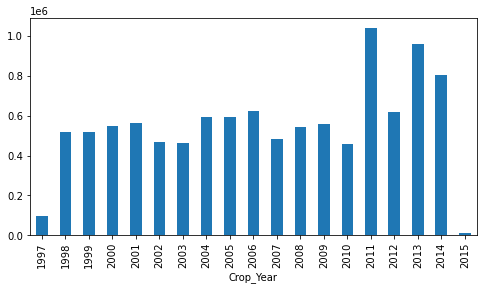

In [26]:
plt.figure(figsize = (8, 4))
agri_india.groupby("Crop_Year")["Production"].mean().plot.bar()
plt.show()

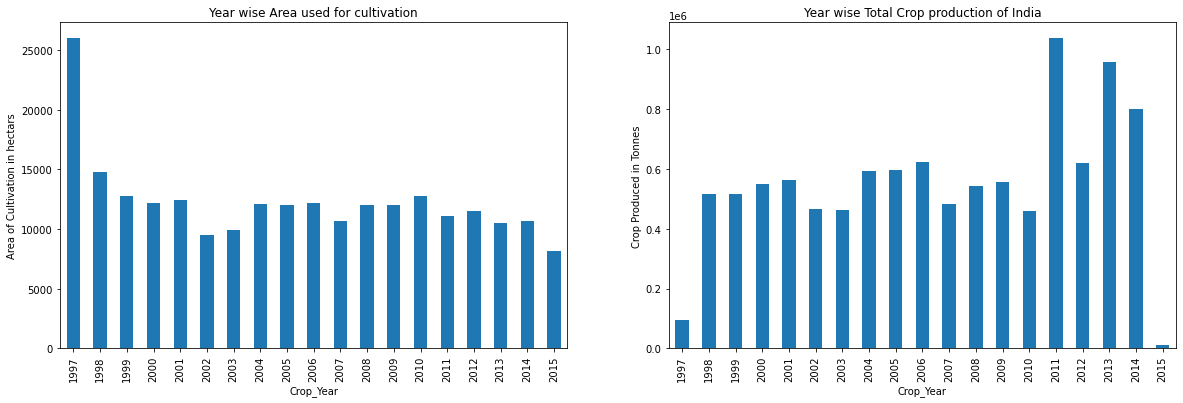

In [27]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title("Year wise Area used for cultivation")
agri_india.groupby("Crop_Year")["Area"].mean().plot.bar()
plt.ylabel('Area of Cultivation in hectars')
plt.subplot(1,2,2)  
plt.title("Year wise Total Crop production of India")
agri_india.groupby("Crop_Year")["Production"].mean().plot.bar()
plt.ylabel('Crop Produced in Tonnes')
plt.show()

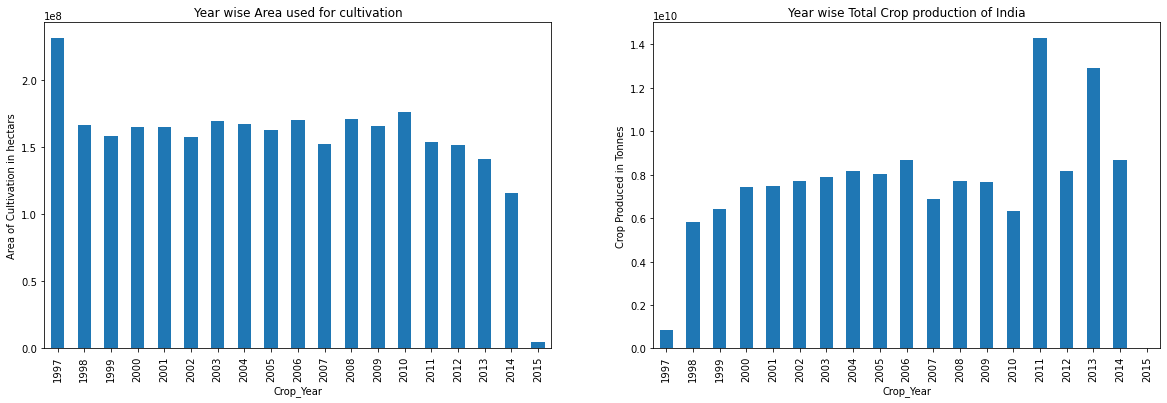

In [28]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title("Year wise Area used for cultivation")
agri_india.groupby("Crop_Year")["Area"].sum().plot.bar()
plt.ylabel('Area of Cultivation in hectars')
plt.subplot(1,2,2)
plt.title("Year wise Total Crop production of India")
agri_india.groupby("Crop_Year")["Production"].sum().plot.bar()
plt.ylabel('Crop Produced in Tonnes')
plt.show()

**`Inference:`** 1). The highest average crop production in india occured in the year 2011 followed by 2013 and 2014.
                 2). The average Area of cultivation per year per crop is almost same after 1997.

In [29]:
agri_india.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22605
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Jharkhand                       1266
Manipur                         1266
Mizoram                          954
P

## Karnataka Crop Analytics

In [30]:
agri_karnataka = agri_india[agri_india.State_Name == 'Karnataka']

In [31]:
agri_karnataka

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Crop_Yeild
76865,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0,429.58
76866,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0,1089.20
76867,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0,872.90
76868,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0,1476.72
76869,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0,480.07
...,...,...,...,...,...,...,...,...
97981,Karnataka,YADGIR,2014,Summer,Onion,7.0,34.0,4934.86
97982,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0,2340.64
97983,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0,362.86
97984,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0,9065.38


In [32]:
agri_karnataka.Crop.value_counts()

Maize                        1331
Rice                         1195
Sunflower                    1149
Jowar                         962
Dry chillies                  949
Horse-gram                    907
Groundnut                     905
Ragi                          838
Onion                         837
Moong(Green Gram)             659
Urad                          549
Coconut                       479
Gram                          461
Cotton(lint)                  449
Arhar/Tur                     448
Potato                        447
Sesamum                       438
Niger seed                    407
Other Kharif pulses           405
Sugarcane                     402
Other  Rabi pulses            386
Castor seed                   373
Coriander                     366
Turmeric                      361
Bajra                         346
Banana                        333
Arecanut                      329
Dry ginger                    318
Cowpea(Lobia)                 316
Small millets 

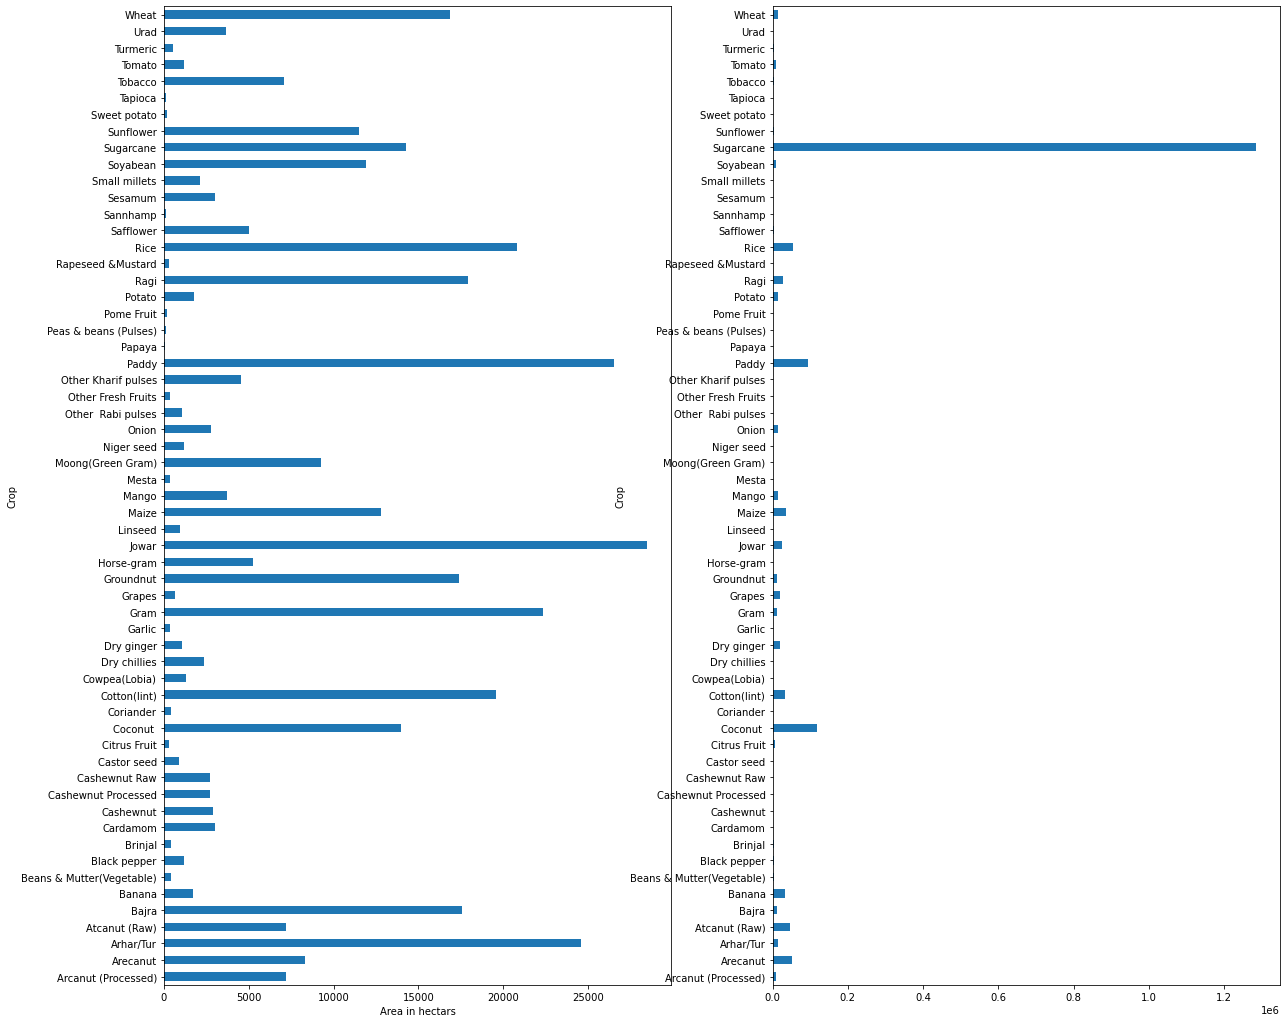

In [33]:
plt.figure(figsize = (20, 18))
plt.subplot(1,2,1)
agri_karnataka.groupby("Crop")['Area'].mean().plot.barh()
plt.xlabel("Area in hectars")
plt.subplot(1,2,2)
agri_karnataka.groupby("Crop")['Production'].mean().plot.barh()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.show()

In [34]:
len(list(agri_india['District_Name'].unique()))

646

In [35]:
agri_india.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56130
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

# Imputations on Crop variable:

In [36]:
crop_type_total = ['Total foodgrain', 'Pulses total', 'Oilseeds total']
# list of total unique crop type that fall into one category.

highest_produce_crops = ['Sugarcane', 'Coconut ']                       
# List of crops Highest production in Tonnes. 

cropstype_total = agri_india[agri_india.Crop.isin(crop_type_total)] 
# Extracted 'Total foodgrain', 'Pulses total', 'Oilseeds total' from main dataset and stored in dataframe 'cropstype_total'

high_produce = agri_india[agri_india.Crop.isin(highest_produce_crops)]
# Extracted 'Sugarcane', 'Coconut '  from main dataset and stored in dataframe 'high_produce'.

agri_india = agri_india[~(agri_india.Crop.isin(crop_type_total))]
# Dropped 'Total foodgrain', 'Pulses total', 'Oilseeds total' as they are acting as an outlier to our analysis.

agri_india = agri_india[~(agri_india.Crop.isin(highest_produce_crops))]
# Dropped 'Sugarcane', 'Coconut ' as they are acting as an outlier to our analysis.


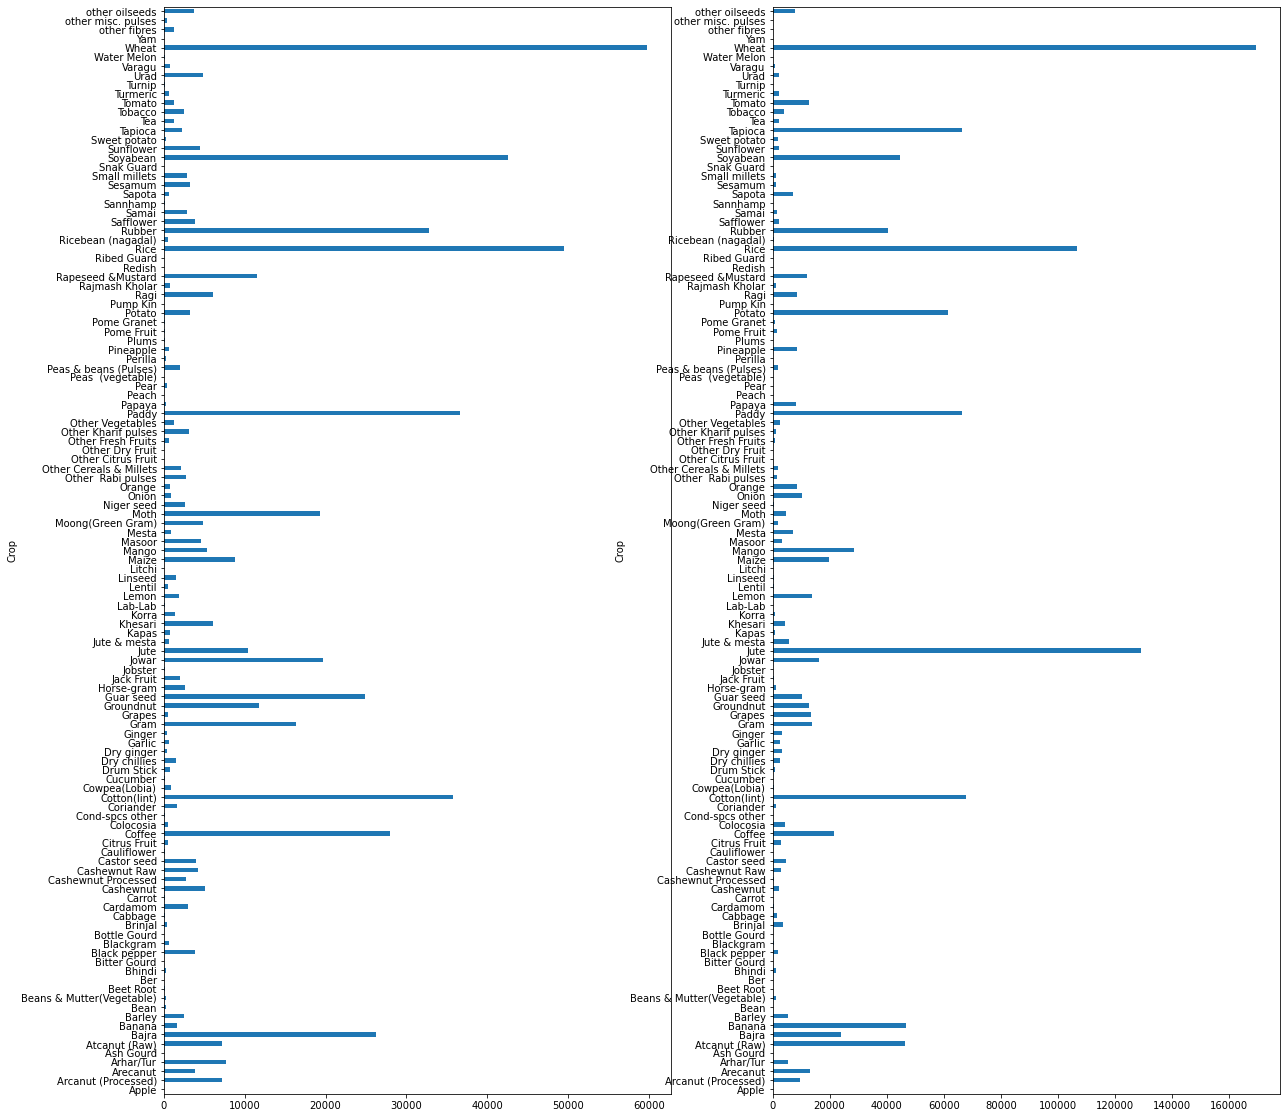

In [37]:
plt.figure(figsize = (20, 20))
plt.subplot(1,2,1)
agri_india.groupby("Crop")["Area"].mean().plot.barh()
plt.subplot(1,2,2)
agri_india.groupby("Crop")["Production"].mean().plot.barh()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.show()

**`Inference:`** 
1. The 1st barplot shows us the plot of unique Crop's Average Area of cultivation per Season per year per district per state.

2. The 2nd barplot shows us the plot of unique Crop's Average Production in Tonnes per Season per year per district per state.

In [38]:
lat_lon_india = pd.read_csv('Lat_lon_india.csv')

In [39]:
lat_lon_india

,Unnamed: 0,State.Name,latitude,longitude
0,1,ANDAMAN AND NICOBAR,11.667026,92.735983
1,2,ANDHRA PRADESH,14.750429,78.570026
2,3,ARUNACHAL PRADESH,27.100399,93.616601
3,4,ASSAM,26.749981,94.216667
4,5,BIHAR,25.785414,87.479973
5,6,CHANDIGARH,30.719997,76.780006
6,7,CHHATTISGARH,22.090420,82.159987
7,8,DADRA AND NAGAR HAVELI,20.266578,73.016618
8,9,DELHI,28.669993,77.230004
9,10,GOA,15.491997,73.818001


In [40]:
col = lat_lon_india.columns[1:]
lat_lon_india = lat_lon_india[col]
lat_lon_india

,State.Name,latitude,longitude
0,ANDAMAN AND NICOBAR,11.667026,92.735983
1,ANDHRA PRADESH,14.750429,78.570026
2,ARUNACHAL PRADESH,27.100399,93.616601
3,ASSAM,26.749981,94.216667
4,BIHAR,25.785414,87.479973
5,CHANDIGARH,30.719997,76.780006
6,CHHATTISGARH,22.090420,82.159987
7,DADRA AND NAGAR HAVELI,20.266578,73.016618
8,DELHI,28.669993,77.230004
9,GOA,15.491997,73.818001


In [64]:
lat_lon_india["State.Name"] = lat_lon_india["State.Name"].str.lower()
lat_lon_india

,State.Name,latitude,longitude
0,andaman and nicobar,11.667026,92.735983
1,andhra pradesh,14.750429,78.570026
2,arunachal pradesh,27.100399,93.616601
3,assam,26.749981,94.216667
4,bihar,25.785414,87.479973
5,chandigarh,30.719997,76.780006
6,chhattisgarh,22.090420,82.159987
7,dadra and nagar haveli,20.266578,73.016618
8,delhi,28.669993,77.230004
9,goa,15.491997,73.818001


In [65]:
agri_india.State_Name.value_counts()

Uttar Pradesh                  31819
Madhya Pradesh                 21866
Karnataka                      20198
Bihar                          18329
Assam                          13768
Odisha                         12979
Tamil Nadu                     12383
Maharashtra                    11982
Rajasthan                      11709
Chhattisgarh                   10108
Andhra Pradesh                  9160
West Bengal                     9071
Gujarat                         8080
Telangana                       5411
Uttarakhand                     4664
Haryana                         4281
Nagaland                        3768
Kerala                          3581
Punjab                          2927
Meghalaya                       2741
Himachal Pradesh                2396
Arunachal Pradesh               2039
Jammu and Kashmir               1606
Tripura                         1312
Jharkhand                       1250
Manipur                         1227
Mizoram                          887
P

In [42]:
len(list(agri_india['State_Name'].unique()))

33

# Modelling:

In [43]:
agri_india.columns 

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Crop_Yeild'],
      dtype='object')

In [44]:
data_req = agri_india[['Crop', 'Area','Production']]
data_req.head()

,Crop,Area,Production
0,Arecanut,1254.0,2000.0
1,Other Kharif pulses,2.0,1.0
2,Rice,102.0,321.0
3,Banana,176.0,641.0
4,Cashewnut,720.0,165.0


In [45]:
col = list(data_req.columns)
col = col[1:]
col

['Area', 'Production']

In [46]:
data_req[col].corr() # correlation between the target variables. 


,Area,Production
Area,1.000000,0.695904
Production,0.695904,1.000000


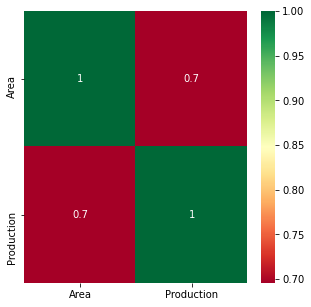

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(data_req[col].corr(), annot=True, cmap = 'RdYlGn')
plt.show()

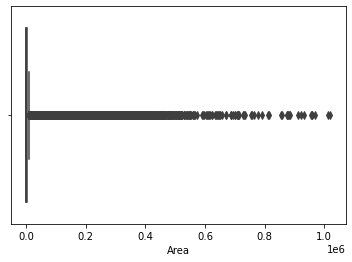

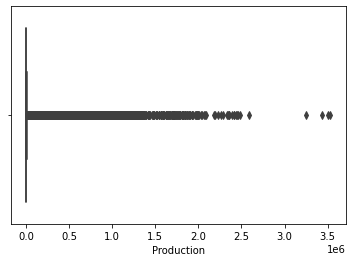

In [48]:
for c in col:
    sns.boxplot(data_req[c]) 
    plt.show();
    

In [49]:
data_req[col].describe()

,Area,Production
count,2.316990e+05,2.316990e+05
mean,1.182779e+04,2.397935e+04
std,3.825236e+04,9.678104e+04
min,1.000000e-01,0.000000e+00
25%,8.300000e+01,7.900000e+01
50%,5.980000e+02,6.350000e+02
75%,4.400000e+03,5.681150e+03
max,1.020181e+06,3.530571e+06


In [50]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
# How different your date is from the randomly scattered data?

hopkins(data_req[col])

0.9992825392115685

In [52]:
# Create a data frame without country column
ap_df = data_req[col]

# instantiate
scaler = StandardScaler()

# fit_transform
ap_df_scaled = scaler.fit_transform(ap_df)
ap_df_scaled.shape

(231699, 2)

In [53]:
ap_df_scaled

array([[-0.2764224 , -0.22710441],
       [-0.30915248, -0.24775933],
       [-0.30653825, -0.24445289],
       ...,
       [-0.29281358, -0.24298565],
       [ 6.9884262 ,  5.93009612],
       [-0.30462987, -0.24686039]])

In [54]:
# Create a dataframe using that array
ap_df_scaled = pd.DataFrame(ap_df_scaled)


ap_df_scaled.columns = ['Area', 'Production']
ap_df_scaled.head()

,Area,Production
0,-0.276422,-0.227104
1,-0.309152,-0.247759
2,-0.306538,-0.244453
3,-0.304604,-0.241146
4,-0.290382,-0.246065


In [55]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(ap_df_scaled)

KMeans(max_iter=50, n_clusters=4)

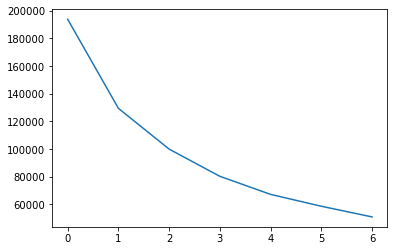

In [56]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ap_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [57]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(ap_df_scaled)

KMeans(max_iter=50, n_clusters=5)

In [58]:
kmeans.labels_

array([0, 0, 0, ..., 0, 4, 0])

In [59]:
# assign the label
data_req['cluster_id'] = kmeans.labels_
data_req.head() 

,Crop,Area,Production,cluster_id
0,Arecanut,1254.0,2000.0,0
1,Other Kharif pulses,2.0,1.0,0
2,Rice,102.0,321.0,0
3,Banana,176.0,641.0,0
4,Cashewnut,720.0,165.0,0


In [60]:
data_req['cluster_id'].value_counts()

0    210784
3     13995
2      5329
1       971
4       620
Name: cluster_id, dtype: int64

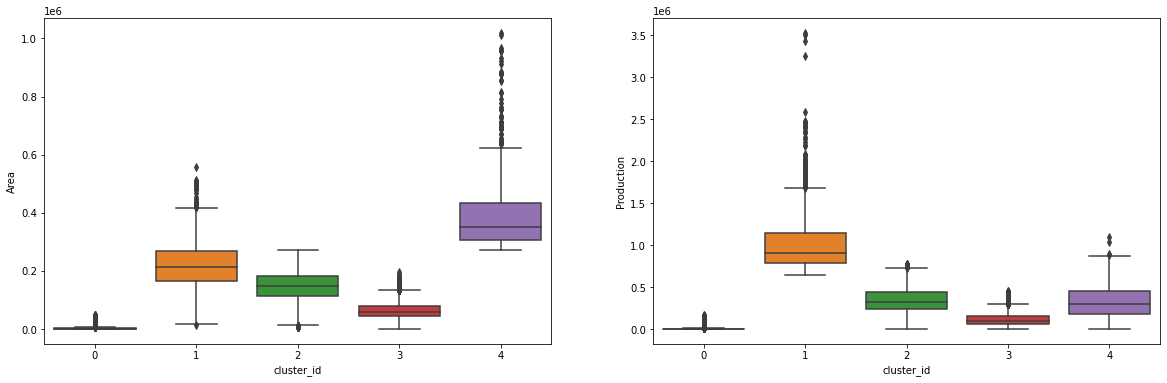

In [61]:
# plot the Boxplots to understand which cluster is more to be targeted.
plt.figure(figsize = [20,6])
plt.subplot(1, 2 ,1)
sns.boxplot(x='cluster_id', y='Area', data=data_req)
plt.subplot(1, 2 ,2)
sns.boxplot(x='cluster_id', y='Production', data = data_req)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.show()

In [62]:
data_req[data_req['cluster_id'] == 4].head(20)

,Crop,Area,Production,cluster_id
208,Groundnut,650800.0,228400.0,4
236,Groundnut,755200.0,867800.0,4
261,Groundnut,694865.0,249457.0,4
294,Groundnut,791559.0,884963.0,4
342,Groundnut,758700.0,333828.0,4
386,Groundnut,732262.0,259953.0,4
443,Groundnut,670935.0,187862.0,4
498,Groundnut,857823.0,684543.0,4
540,Groundnut,877029.0,362213.0,4
581,Groundnut,644007.0,43148.0,4


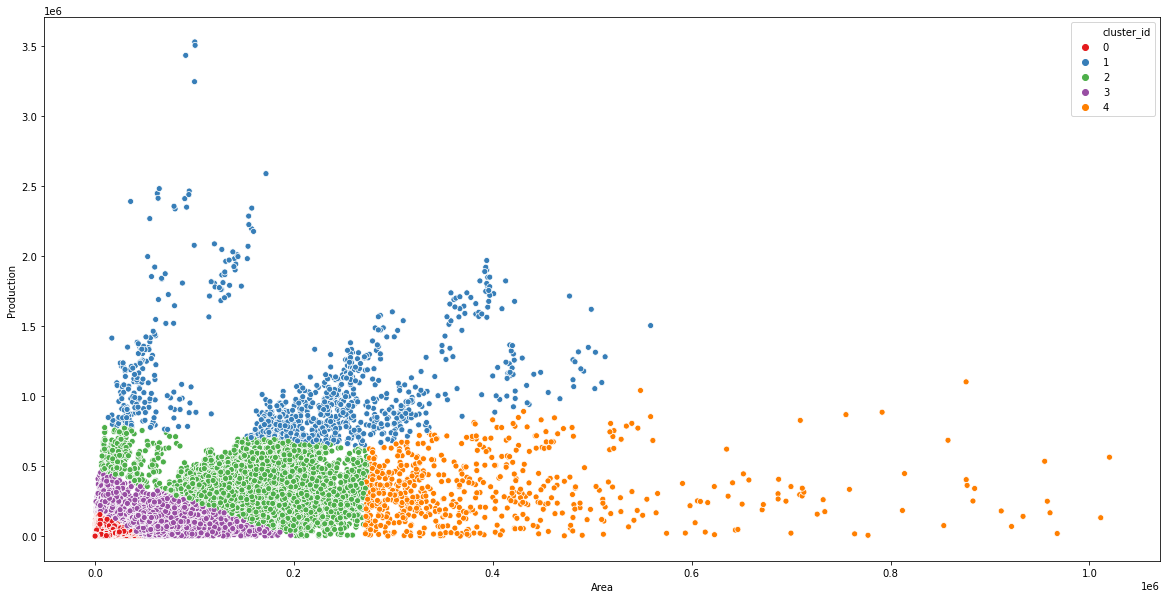

In [63]:
# Scatter plot to visualize the data based on K_means clustering
plt.figure(figsize = [20,10])
sns.scatterplot(x='Area', y='Production', hue= 'cluster_id', data=data_req, palette='Set1')
plt.show()